In [ ]:
import sdv
print(sdv.__version__)
# Checked due to import errors

1.19.0


In [ ]:
import pandas as pd
# from sdv.metadata import Metadata
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdmetrics.reports.single_table import QualityReport
import os

In [ ]:
model_folder = "D:/AU/Sem2/ML/HandsOn Prac/Project/ML_2025_6_Panchtron/models/"
data_file = "D:/AU/Sem2/ML/HandsOn Prac/Project/ML_2025_6_Panchtron/Dataset/imputed_MICE.csv"

In [67]:
raw_imputed_data=pd.read_csv(data_file)

In [68]:
raw_imputed_data.head()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,01-01-2022,NaN,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
1,Athlete 1 Bergdorf,01-10-2022,Monday,48.000000,120.000000,58.000000,51.000000,6.360000,5.620000,11.020000,...,0.74000,3.210000,44.463945,11.718800,5.620000,26.300000,22.300000,3.970000,64.600000,0.330000
2,Athlete 1 Bergdorf,01-11-2022,NaN,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
3,Athlete 1 Bergdorf,01-12-2022,NaN,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
4,Athlete 1 Bergdorf,1/13/2022,Thursday,53.000000,121.000000,61.000000,55.000000,6.250000,5.560000,10.150000,...,0.70000,1.890000,37.000000,13.007800,5.560000,25.100000,8.600000,2.680000,39.600000,0.356758


In [77]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=raw_imputed_data)

In [78]:
model = CTGANSynthesizer(metadata)
model.fit(raw_imputed_data)
model.save("D:/AU/Sem2/ML/HandsOn Prac/Project/ML_2025_6_Panchtron/models/ctgan_model.pkl")

d:\AU\Sem2\ML\HandsOn Prac\Project\myenv\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
d:\AU\Sem2\ML\HandsOn Prac\Project\myenv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [86]:
synthetic_data = model.sample(num_rows=10000)
synthetic_data.to_csv("D:/AU/Sem2/ML/HandsOn Prac/Project/ML_2025_6_Panchtron/Dataset/synthetic_data.csv", index=False)

In [87]:
report = QualityReport()
report.generate(
    real_data=raw_imputed_data,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict()
)

print("\nQuality Report Summary:")
print(report.get_properties())


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 28/28 [00:03<00:00,  8.59it/s]|
Column Shapes Score: 70.73%

(2/2) Evaluating Column Pair Trends: |██████████| 378/378 [00:01<00:00, 208.43it/s]|
Column Pair Trends Score: 85.27%

Overall Score (Average): 78.0%


Quality Report Summary:
             Property     Score
0       Column Shapes  0.707318
1  Column Pair Trends  0.852723


In [88]:
print("Quality Score:", report.get_score())
print(report.get_properties())

Quality Score: 0.7800205405119263
             Property     Score
0       Column Shapes  0.707318
1  Column Pair Trends  0.852723


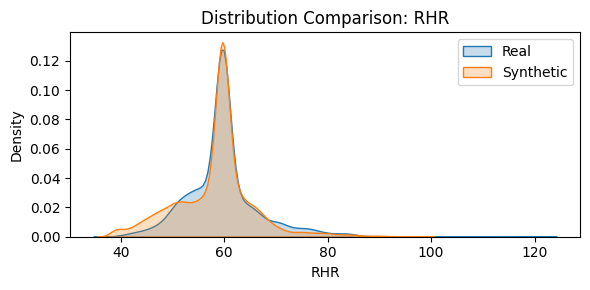

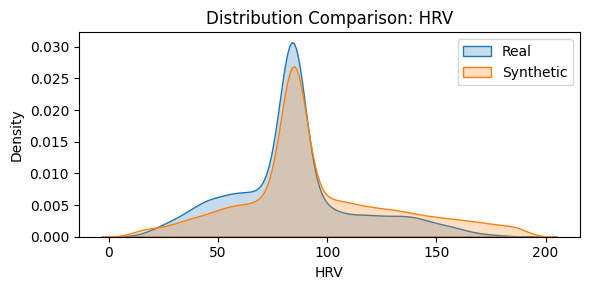

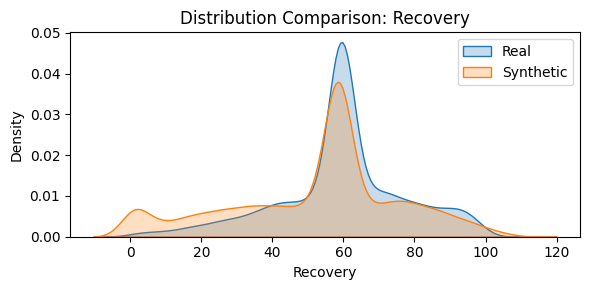

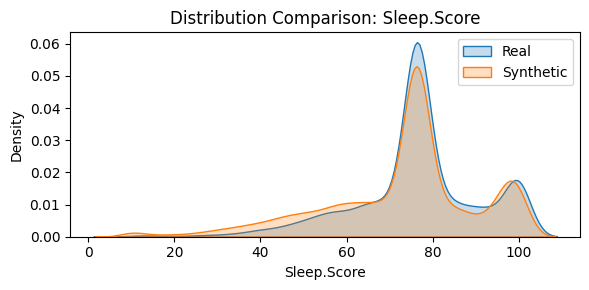

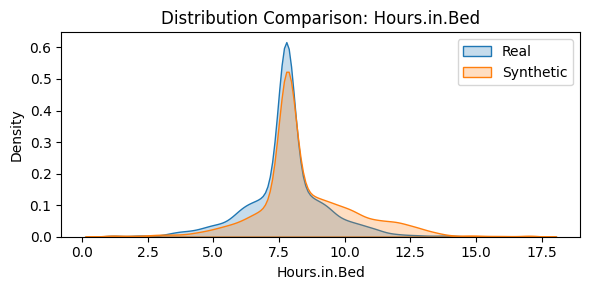

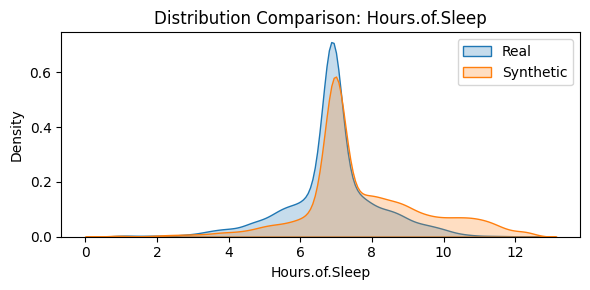

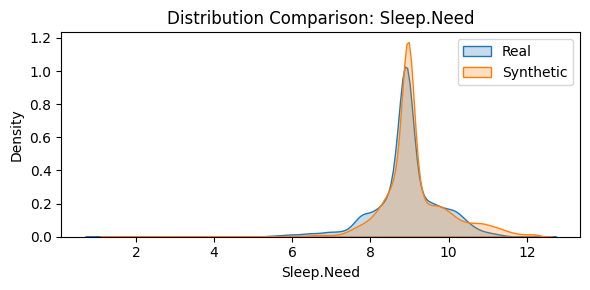

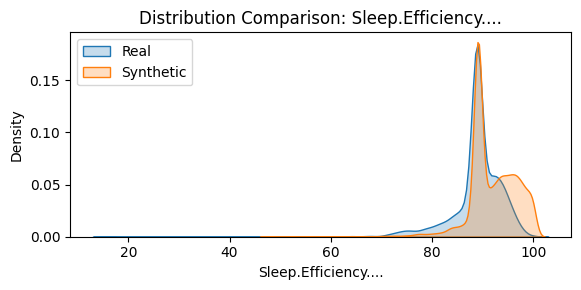

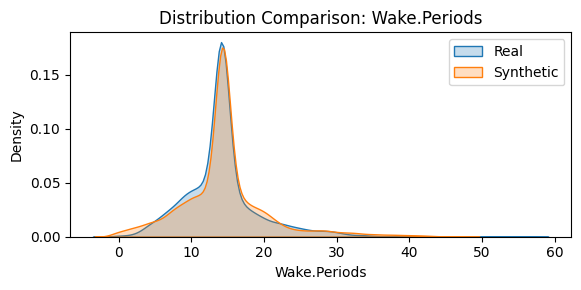

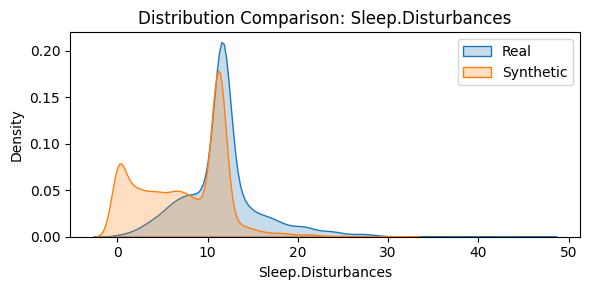

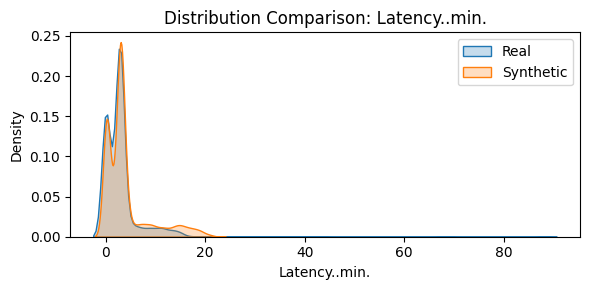

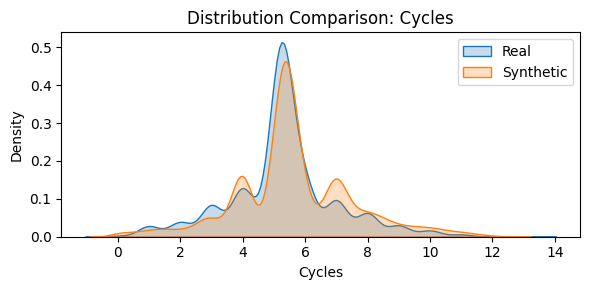

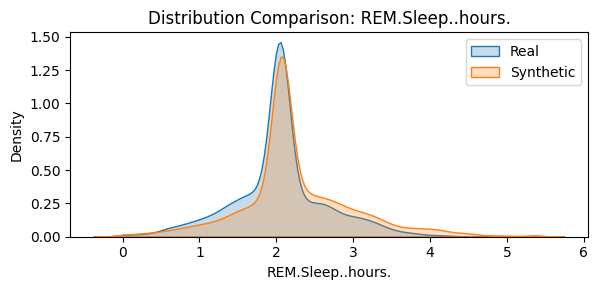

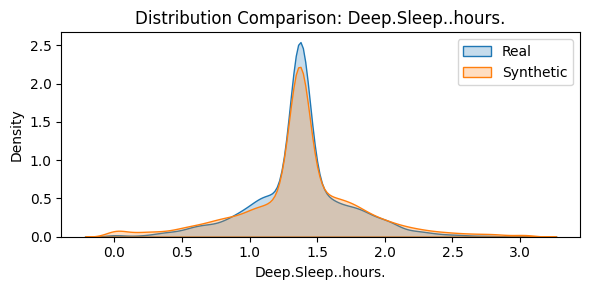

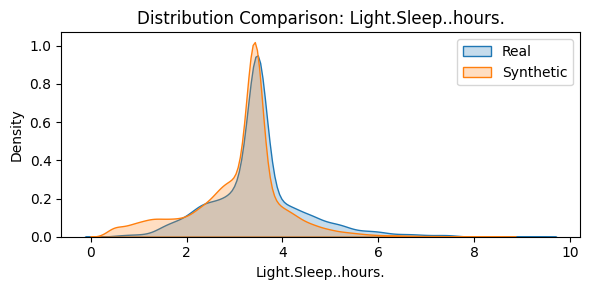

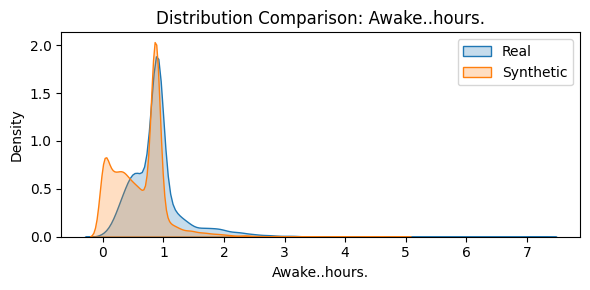

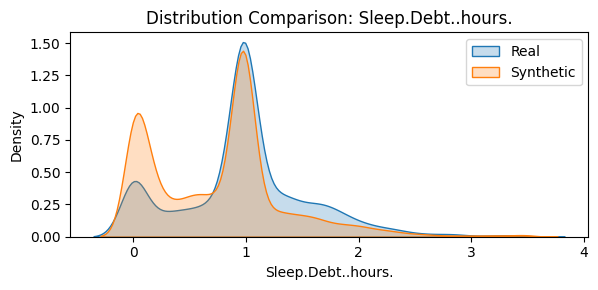

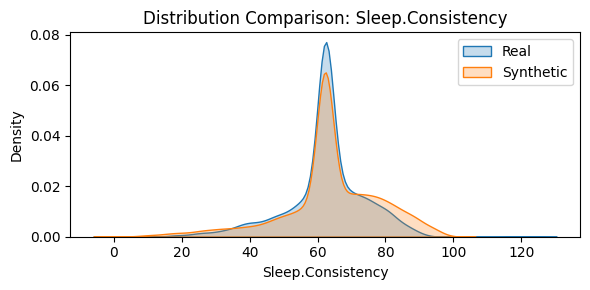

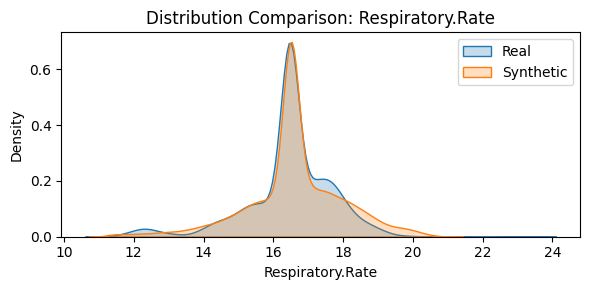

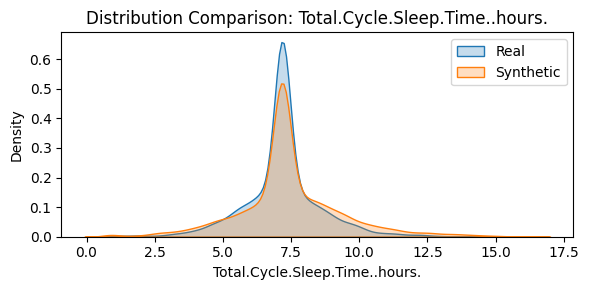

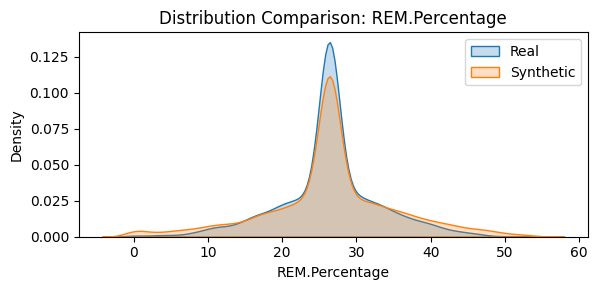

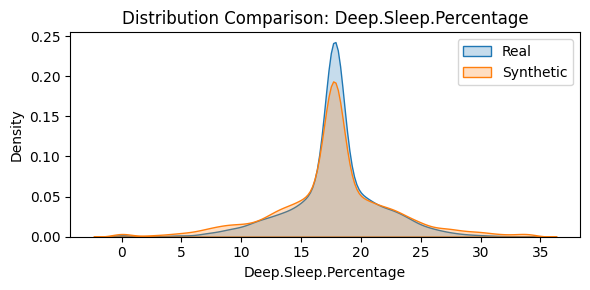

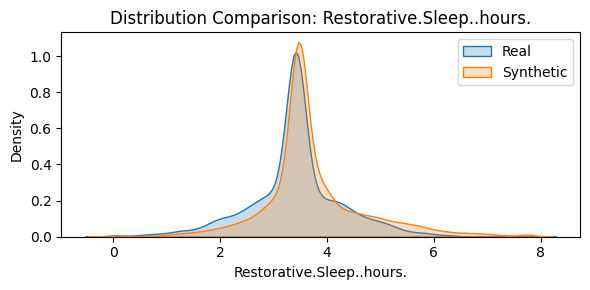

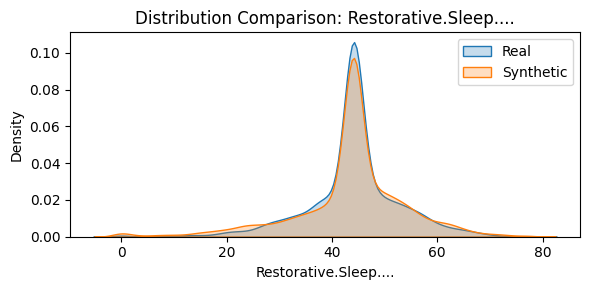

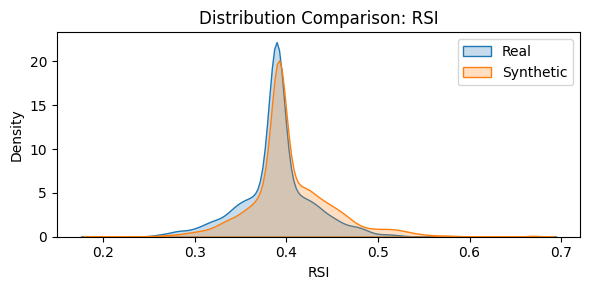

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = raw_imputed_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(raw_imputed_data[col], label='Real', fill=True)
    sns.kdeplot(synthetic_data[col], label='Synthetic', fill=True)
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()
